In [1]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [ ]:
# Data cleaning

In [13]:
#Check Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
 #Check for Missing Values
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
#Check for Duplicates
df.duplicated().sum()



0

In [ ]:
# Data Cleaning Summary

#- Dataset loaded successfully.
#- # No missing values found in any column.
#- # No duplicate rows were present.
#- Dataset is ready for EDA (Exploratory Data Analysis).


In [ ]:
#PERFORMING EDA USING VISUALISATION (USE SEABORN,MATPLOTLIB)

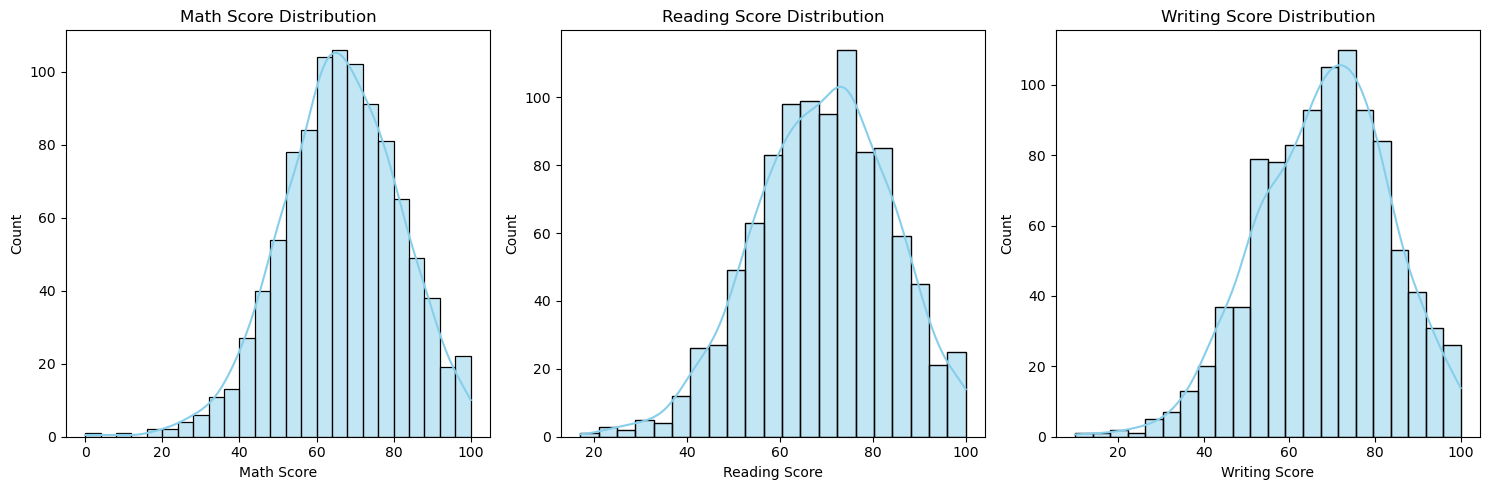

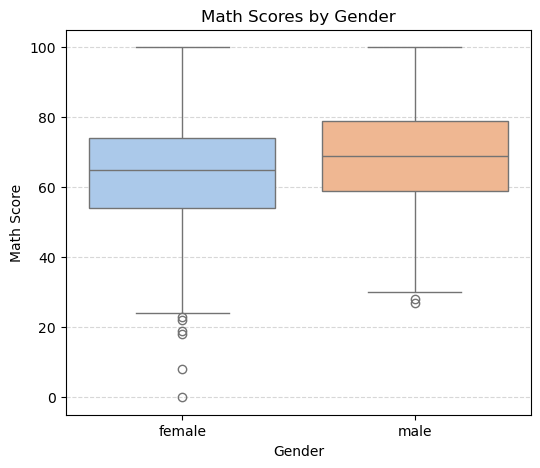

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot score distributions
plt.figure(figsize=(15, 5))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[subject], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{subject.title()} Distribution')
    plt.xlabel(subject.title())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Boxplot: Math score vs gender
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='gender', y='math score', hue='gender', palette='pastel', legend=False)
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()



In [ ]:
# CHECK BALANCING OF DATA

In [33]:
print(df['pass'].value_counts(normalize=True))


pass
1    0.897
0    0.103
Name: proportion, dtype: float64


In [ ]:
#Predict whether a student is pass or fail

In [72]:
# Define 'pass' based ONLY on writing score to avoid data leakage
df['pass'] = (df['writing score'] >= 50).astype(int)

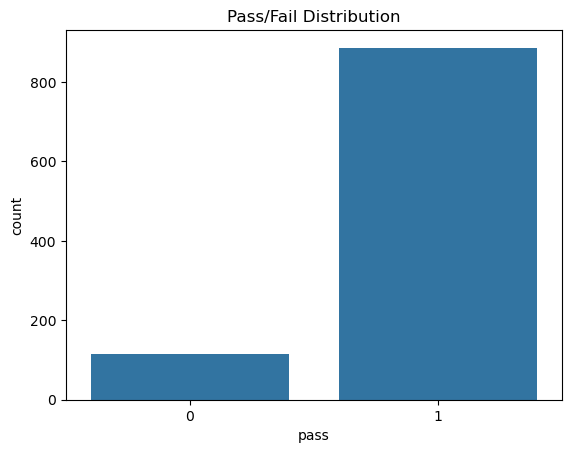

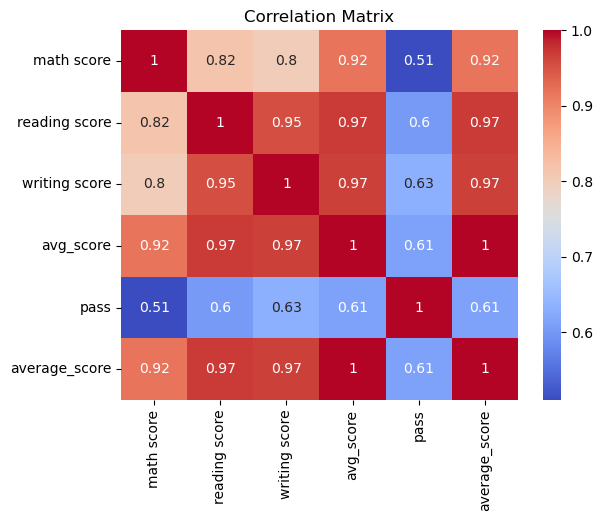

In [74]:
# Plotting distribution of pass/fail
sns.countplot(data=df, x='pass')
plt.title('Pass/Fail Distribution')
plt.show()

# Correlation heatmap (numeric features only)
numeric = df.select_dtypes(include='number')
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [76]:
# Copy the dataset for encoding
df_encoded = df.copy()

# Encode categorical columns
encoder = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Select features (excluding writing score used in 'pass')
features = ['gender', 'race/ethnicity', 'parental level of education',
            'lunch', 'test preparation course', 'math score', 'reading score']
X = df_encoded[features]
y = df_encoded['pass']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [ ]:
# Use Random forest for Classification

In [80]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [82]:
y_pred = model.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 95.67%

Confusion Matrix:
 [[ 27   7]
 [  6 260]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        34
           1       0.97      0.98      0.98       266

    accuracy                           0.96       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
# HANDLING IMBALANCE DATA USING SMOTE

In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data before applying SMOTE (only on training set!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [93]:
#COMPARSION OF RANODM FOREST CLASSIFIER AND LOGISTIC REGRESSION
# USING GridSearchCV FOR FINE TUNING

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initialize and run GridSearch
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train_resampled, y_train_resampled)

# Best estimator
best_rf = grid.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)


In [88]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression on resampled data
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_lr = lr.predict(X_test)


In [ ]:
#EVAULATE BOTH MODELS USING CONFUSION MATRIX AND ACCURACY SCORE

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Results:")
print(confusion_matrix(y_test, best_rf.predict(X_test)))
print(classification_report(y_test, best_rf.predict(X_test)))
print("Accuracy:", accuracy_score(y_test, best_rf.predict(X_test)))

print("\nLogistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Random Forest Results:
[[ 20   3]
 [  3 174]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.98      0.98      0.98       177

    accuracy                           0.97       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.97      0.97      0.97       200

Accuracy: 0.97

Logistic Regression Results:
[[ 21   2]
 [  3 174]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.99      0.98      0.99       177

    accuracy                           0.97       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.98      0.97      0.98       200

Accuracy: 0.975
